In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


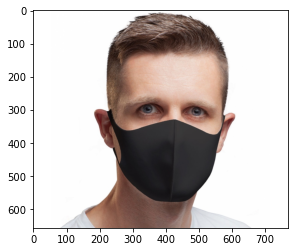

In [44]:
img = cv2.imread('./test_imgs/2.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [45]:
#加载SSD模型
face_detector = cv2.dnn.readNetFromCaffe('./weights/deploy.prototxt.txt','weights/res10_300x300_ssd_iter_140000.caffemodel')

In [46]:
# 转为Blob
img_blob = cv2.dnn.blobFromImage(img,1,(300,300),(104,177,123),swapRB=True)

In [47]:
# 输入
face_detector.setInput(img_blob)

In [48]:
# 推理
detections = face_detector.forward()

In [49]:
detections.shape

(1, 1, 200, 7)

In [50]:
# 人数
person_count = detections.shape[2]


In [51]:
person_count

200

In [52]:
# 人脸检测函数
def face_detect(img):
    #转为Blob
    img_blob = cv2.dnn.blobFromImage(img,1,(300,300),(104,177,123),swapRB=True)
    # 输入
    face_detector.setInput(img_blob)
    # 推理
    detections = face_detector.forward()
    # 获取原图尺寸
    img_h,img_w = img.shape[:2]
    
    # 人脸数量
    person_count = detections.shape[2]

    for face_index in range(person_count):
        # 置信度
        confidence = detections[0,0,face_index,2]
        if confidence > 0.5:
            locations = detections[0,0,face_index,3:7] * np.array([img_w,img_h,img_w,img_h])
            # 取证
            l,t,r,b = locations.astype('int')
            # cv2.rectangle(img,(l,t),(r,b),(0,255,0),5)
            return img[t:b,l:r]
    return None

In [53]:
# 测试图片
img_new = cv2.imread('./images/1.yes/9-with-mask.jpg')

In [54]:
face_crop = face_detect(img_new)

In [55]:
face_crop.shape

(249, 180, 3)

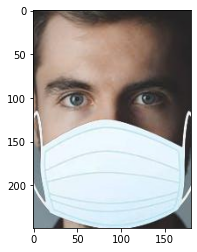

In [56]:
# 显示图片
plt.imshow(cv2.cvtColor(face_crop,cv2.COLOR_BGR2RGB))

In [57]:
# 转为Blob的函数
def imgBlob(img):
    # 转为Blob
    img_blob = cv2.dnn.blobFromImage(img,1,(100,100),(104,177,123),swapRB=True)
    # 压缩维度
    img_squeeze = np.squeeze(img_blob).T
    # 旋转
    img_rotate = cv2.rotate(img_squeeze,cv2.ROTATE_90_CLOCKWISE)
     #黑白反转
    #img_WBcoler =255-img_rotate
    # 镜像
    img_flip =  cv2.flip(img_rotate,1)
   
    
    # 去除负数，并归一化
    img_blob = np.maximum(img_flip,0) / img_flip.max()
    return img_blob

In [58]:
img_test = cv2.imread('./images/1.yes/12-with-mask.jpg')

In [59]:
img_blob = imgBlob(img_test)

In [60]:
img_blob.max(),img_blob.min()

(1.0, 0.0)

In [61]:
img_blob.shape

(100, 100, 3)

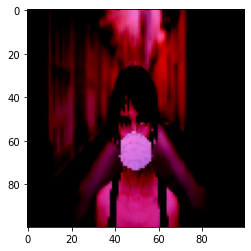

In [62]:
# 显示图片
plt.imshow(img_blob)

In [63]:
import os,glob

In [64]:
import tqdm

In [65]:
labels = os.listdir('images/')

In [66]:
img_list = []
label_list = []
for label in labels:
    # 获取每类文件列表
    file_list =glob.glob('images/%s/*.jpg' % (label))
    file_list =file_list+glob.glob('images/%s/*.png' % (label))
    for img_file in tqdm.tqdm( file_list ,desc = "处理 %s "  % (label)):
        # 读取文件
        img = cv2.imread(img_file)
        # 裁剪人脸
        img_crop = face_detect(img)
        # 判断空的情况
        if img_crop is not None:
            # 转为Blob
            img_blob = imgBlob(img_crop)
            img_list.append(img_blob)
            label_list.append(label)

处理 3.nose : 100%|██████████████████████████████████████████████████████████████████| 701/701 [00:29<00:00, 23.68it/s]


In [70]:
# 转为numpy数据
X = np.asarray(img_list)
Y = np.asarray(label_list)

In [71]:
X.shape,Y.shape

((2799, 100, 100, 3), (2799,))

In [72]:
# 存储为numpy文件
np.savez('./data/imageData.npz',X,Y)

NameError: name 'demo' is not defined